### Robert Williams IS 362 Final project
 

This final project is a brief look into video game consoles sales from 1983-2015

Using Python level 3

Using a premade CVS file from "https://www.kaggle.com/gregorut/videogamesales" This file is very large 

What Companies over the years have dominated the market share from 1983-2015

Consoles sales can help software developers choice what games to make for what console platform.



"PWD" Location of the cvs file to import

In [2]:
pwd

'/Users/bobby/Desktop/School 2020 Spring/IS 362/Final Project/Final project'

Importing code and csv file need for the Final Project

In [1]:
import numpy as np 
import pandas as pd
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))



vgsales.csv



In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/bobby/Desktop/School 2020 Spring/IS 362/Final Project/Final project/vgsales.csv")
df = df[~df.Year.isnull()]
df.Year = df.Year.astype(int)
df.shape

(16327, 11)

Hightest selling video games  of all time (physical media) 

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Making a list of video game consoles

In [5]:
firm_key = {
                'DS'   : 'Nintendo',
                'PS2'  : 'Sony',
                'PS3'  : 'Sony',
                'Wii'  : 'Nintendo',
                'X360' : 'Microsoft',
                'PSP'  : 'Sony',
                'PS'   : 'Sony',
                'PC'   : 'Microsoft',
                'XB'   : 'Microsoft',
                'GBA'  : 'Nintendo',
                'GC'   : 'Nintendo',
                '3DS'  : 'Nintendo',
                'PSV'  : 'Sony',
                'PS4'  : 'Sony',
                'N64'  : 'Nintendo',
                'SNES' : 'Nintendo',
                'XOne' : 'Microsoft',
                'SAT'  : 'Sega',
                'WiiU' : 'Nintendo',
                '2600' : 'Atari',
                'GB'   : 'Nintendo',
                'NES'  : 'Nintendo',
                'DC'   : 'Sega',
                'GEN'  : 'Sega',
                'NG'   : 'Nokia',
                'WS'   : 'Bandai',
                'SCD'  : 'Sega',
                '3DO'  : 'Panasonic',
                'TG16' : 'NEC',
                'PCFX' : 'NEC',
                'GG'   : 'Sega'
} 


console_type_key = {
                'DS'   : 'Handheld',
                'PS2'  : 'Console',
                'PS3'  : 'Console',
                'Wii'  : 'Console',
                'X360' : 'Console',
                'PSP'  : 'Handheld',
                'PS'   : 'Console',
                'PC'   : 'PC',
                'XB'   : 'Console',
                'GBA'  : 'Handheld',
                'GC'   : 'Console',
                '3DS'  : 'Handheld',
                'PSV'  : 'Handheld',
                'PS4'  : 'Console',
                'N64'  : 'Console',
                'SNES' : 'Console',
                'XOne' : 'Console',
                'SAT'  : 'Console',
                'WiiU' : 'Console',
                '2600' : 'Console',
                'GB'   : 'Handheld',
                'NES'  : 'Console',
                'DC'   : 'Console',
                'GEN'  : 'Console',
                'NG'   : 'Handheld',
                'WS'   : 'Handheld',
                'SCD'  : 'Console',
                '3DO'  : 'Console',
                'TG16' : 'Console',
                'PCFX' : 'Console',
                'GG'   : 'Handheld'
} 

df['Platform_Firm'] = df.Platform.map(firm_key)
df['Platform_Type'] = df.Platform.map(console_type_key)

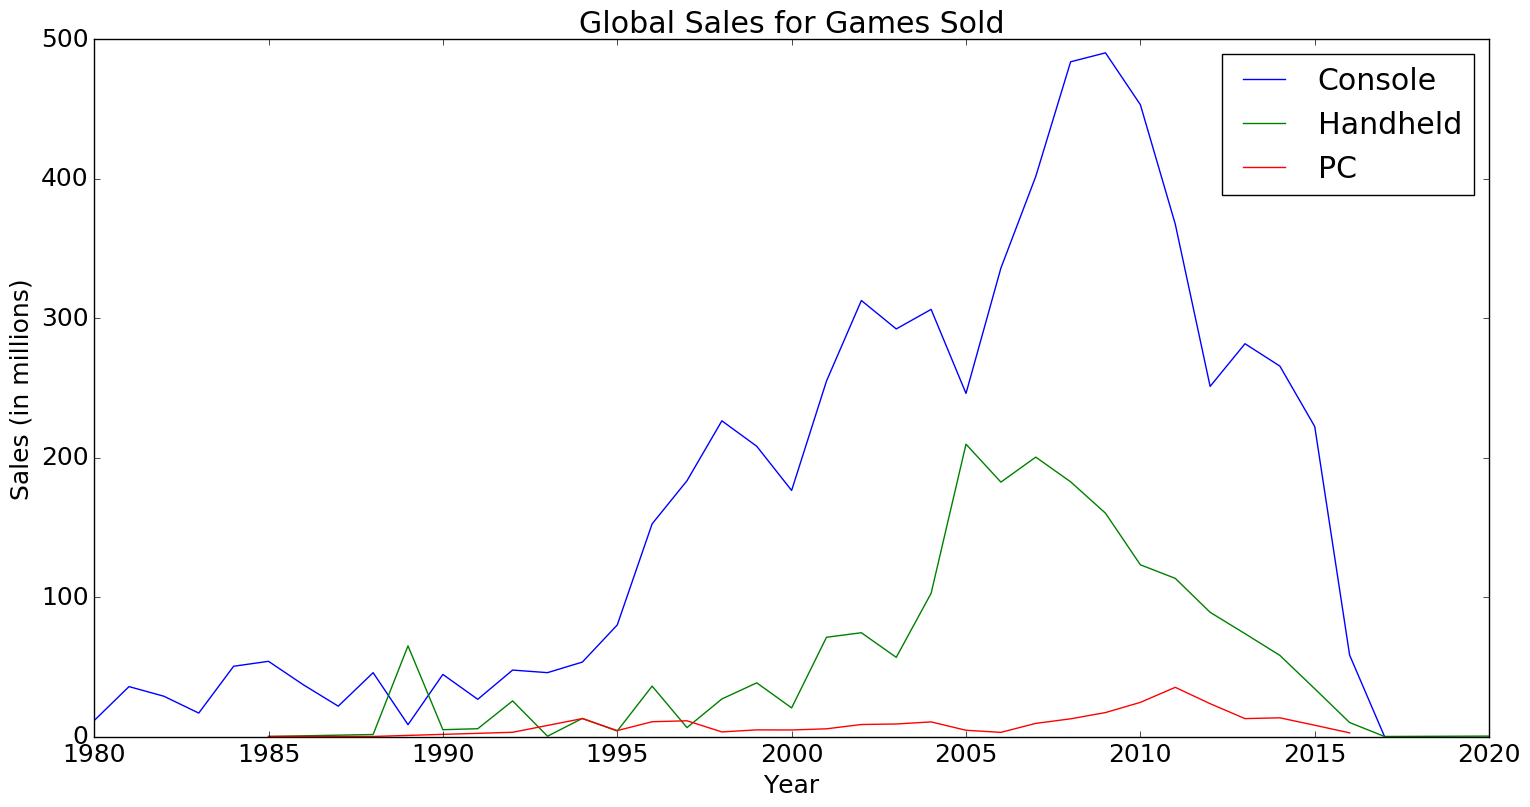

In [6]:
plt.rc('font', size=18)
fig = plt.figure(figsize=(18,9))

df[df.Platform_Type == 'Console'].groupby('Year')['Global_Sales'].sum().plot()
df[df.Platform_Type == 'Handheld'].groupby('Year')['Global_Sales'].sum().plot()
df[df.Platform_Type == 'PC'].groupby('Year')['Global_Sales'].sum().plot()

plt.legend(['Console','Handheld','PC'], loc='best')
plt.title("Global Sales for Games Sold")
plt.ylabel("Sales (in millions)")

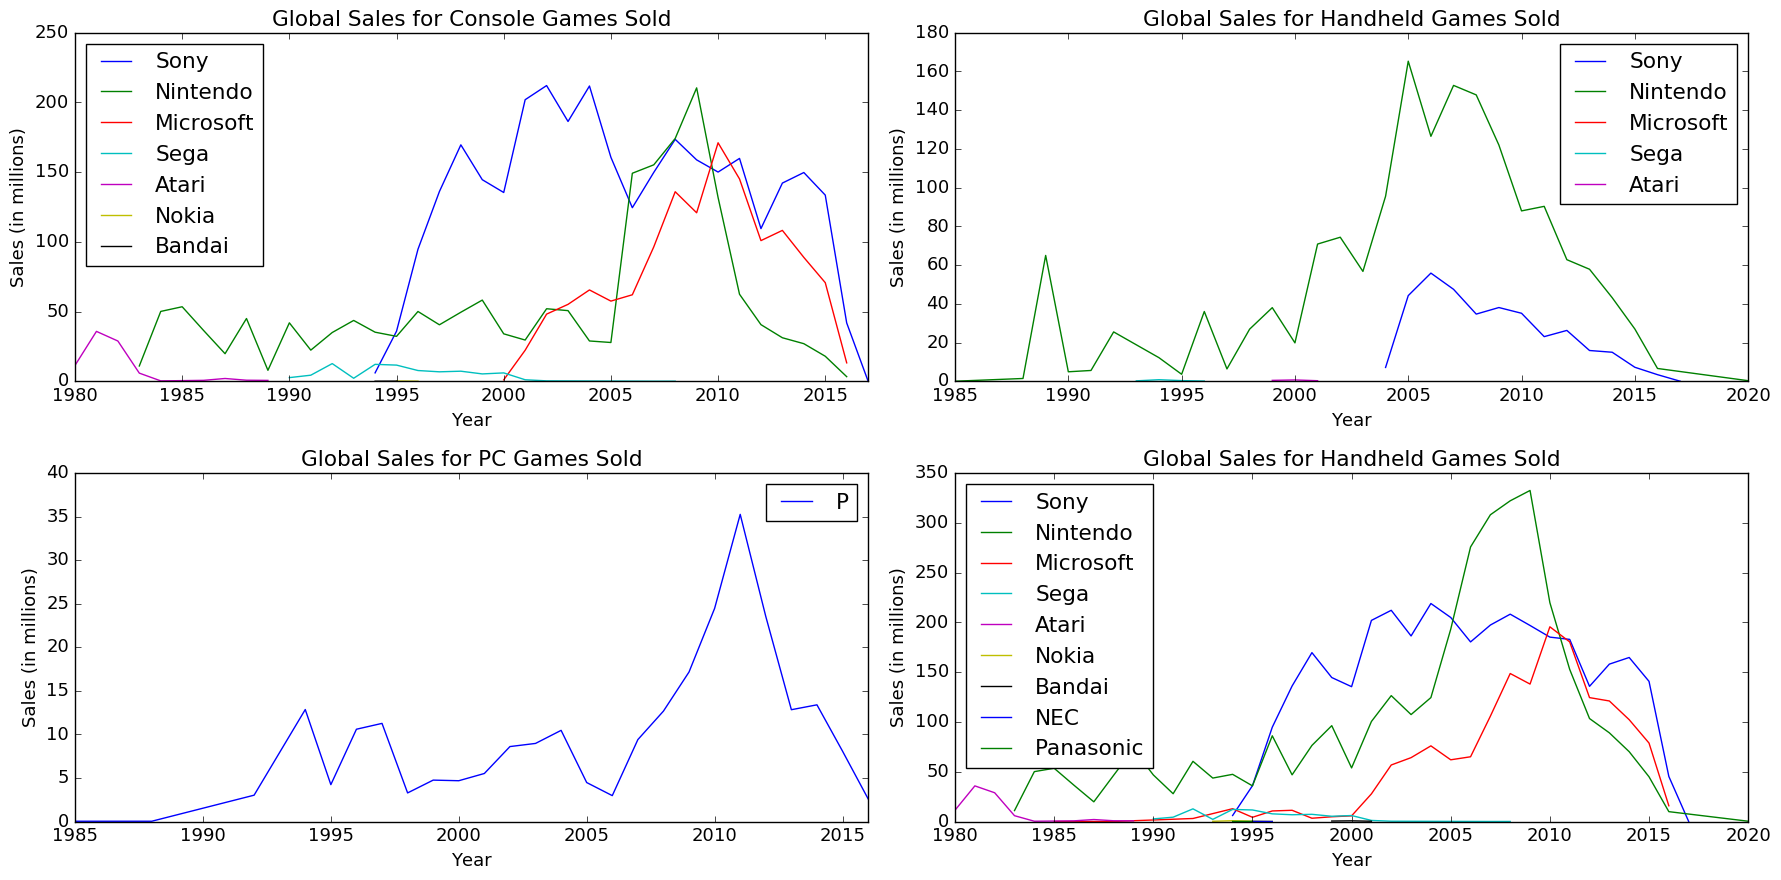

In [7]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(18,9))

platform_firm = list(df.Platform_Firm.value_counts().index) # List Companies

ax1 = plt.subplot2grid((2,2),(0,0))
for firm in platform_firm:
    
    ax = df[df.Platform_Type == 'Console']
   
    try:
        ax[(ax.Platform_Firm == firm)].groupby(['Year'])['Global_Sales'].sum().plot()
        plt.legend(platform_firm, loc='best')
        ax1.set_title("Global Sales for Console Games Sold")
        ax1.set_ylabel("Sales (in millions)")
    except TypeError:
        continue

ax2 = plt.subplot2grid((2,2),(0,1))
for firm in platform_firm:
    ax = df[df.Platform_Type == 'Handheld']
    try:
        ax[(ax.Platform_Firm == firm)].groupby(['Year'])['Global_Sales'].sum().plot()
        plt.legend(platform_firm, loc='best')
        ax2.set_title("Global Sales for Handheld Games Sold")
        ax2.set_ylabel("Sales (in millions)")
    except TypeError:
        continue
        

ax3 = plt.subplot2grid((2,2),(1,0))
df[df.Platform_Type == 'PC'].groupby(['Year'])['Global_Sales'].sum().plot(label='PC')
plt.legend('PC', loc='best')
ax3.set_title("Global Sales for PC Games Sold")
ax3.set_ylabel("Sales (in millions)")

# Comparing all games sold
ax4 = plt.subplot2grid((2,2),(1,1))
for firm in platform_firm:
    try:
        df[(df.Platform_Firm == firm)].groupby(['Year'])['Global_Sales'].sum().plot()
        plt.legend(platform_firm, loc='best')
        ax4.set_title("Global Sales for Handheld Games Sold")
        ax4.set_ylabel("Sales (in millions)")
    except TypeError:
        continue
        
plt.tight_layout()

Graph Interesting points

 Missing data after 2015 

The release of Doom in 1993 help PC shares in the year 1994 

Nintendo GameBoy was released to the world in 1989.

In the year 2010 Microsoft, Nintendo,Sony sold around the same amount of consoles

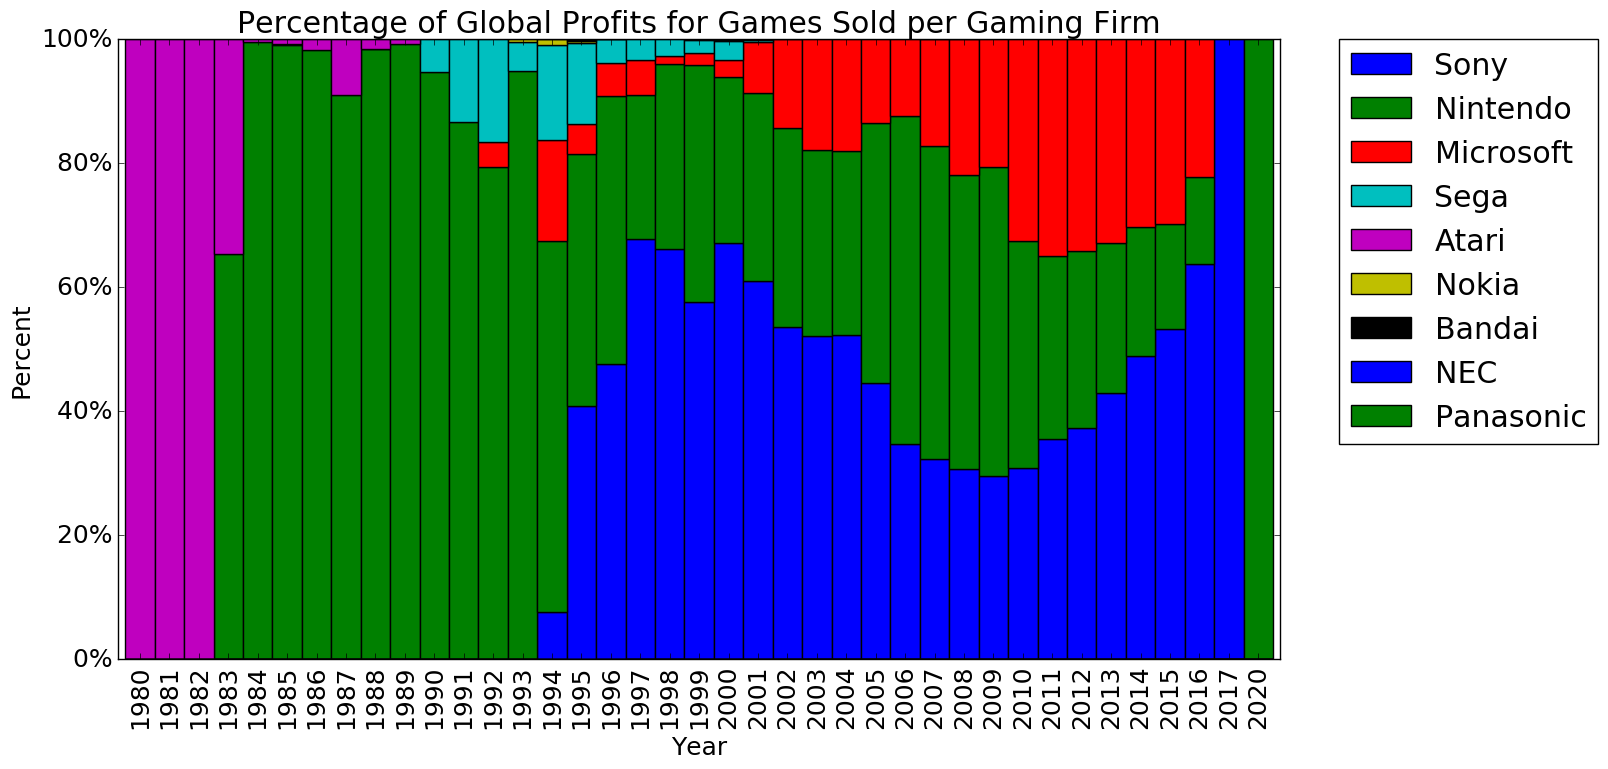

In [9]:
firm_df_key = {}

for i in list(df.Platform_Firm.value_counts().index):
    firm_df_key[i] = df[df.Platform_Firm == i].groupby('Year')['Global_Sales'].sum()

# precent for years and value
firm_percent_df = pd.DataFrame(index=df.Year.value_counts().index.sort_values())


def getit(date, firm):
    dic = firm_df_key[firm].to_dict() # dic = {1980: 0.25552, 1981: 0.3255} etc.
    if date in dic:
        return dic[date]/(df.groupby('Year')['Global_Sales'].sum().to_dict())[date]
    else:
        return 0


for firm in list(df.Platform_Firm.value_counts().index):
    firm_percent_df[firm] = firm_percent_df.index.map(lambda date: getit(date, firm))  #i.e.1980   Nokia

    
plt.rc('font', size=18)
ax11 = firm_percent_df.plot(kind='bar', stacked=True, width=1.0, figsize=(15,8))
yvals = ax11.get_yticks()
ax11.set_yticklabels(['{:3.0f}%'.format(x*100) for x in yvals])
plt.ylim(0,1)
plt.ylabel("Percent")
plt.title("Percentage of Global Profits for Games Sold per Gaming Firm")
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### conclusion

1980-1981 Atari dominated the market before the crash of 1983. Soon after the crash Nintendo became number one from about 1984-1994 With the release of the Nintendo and Gameboy. In 1995 the playstation was release to the market. It started to eat up Nintendo dominated shares in the market.

Sega did get some market share in 1991-1995 with the release of the Sega Genesis. But Nintendo's Super Nintendo was the dominated console at that time. It follow up with the release of handhelds released the Game Boy Color in 1998, GB Advance in 2001, the DS in 2004

Microsoft 2001 was introduced, followed by Xbox 360 in 2005 increasing their gaming market over the next few years.

After 2016 There was some issue with missing data in the dataset.

With the Nintendo Wii U unsuccessful in 2012 Microsoft and Sony take most of the market shares. With Sony in the lead

in the Year 2019 Nintendo has gain back most of the market shares with the release of the nintendo switch. Sony new console the Playstaion 5 and the new Xbox series X to be release later in the year 2020. The fight for market shares will continue.